In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path
import os
import wget

In [3]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/InterpolacionNewton.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewton.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    
else:
    Path_ = file

In [4]:
Data = pd.read_csv(Path_)
Data

,X,Y
0,-3,39
1,-1,19
2,1,-21
3,3,-57
4,5,-65
5,7,-21
6,9,99


In [5]:
X = np.float64(Data.X)
Y = np.float64(Data.Y)
print(X,Y)

[-3. -1.  1.  3.  5.  7.  9.] [ 39.  19. -21. -57. -65. -21.  99.]


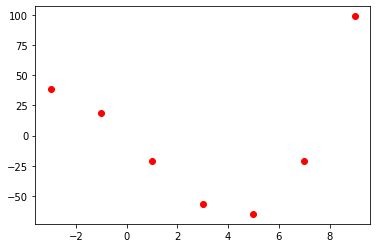

In [6]:
plt.scatter(X,Y,color='r',marker='o')

In [7]:
Diff = np.zeros((len(X),len(X)))
Diff[:,0] = Y
Diff

for i in range(1,len(X)):
    for j in range(i,len(X)):
        Diff[j,i] = Diff[j,i-1] - Diff[j-1,i-1]
Diff

array([[ 39.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 19., -20.,   0.,   0.,   0.,   0.,   0.],
       [-21., -40., -20.,   0.,   0.,   0.,   0.],
       [-57., -36.,   4.,  24.,   0.,   0.,   0.],
       [-65.,  -8.,  28.,  24.,   0.,   0.,   0.],
       [-21.,  44.,  52.,  24.,   0.,   0.,   0.],
       [ 99., 120.,  76.,  24.,   0.,   0.,   0.]])

In [8]:
def NewtonInterpolation(X,Y,x):
    
    sum_ = Y[0]
    
    Diff = np.zeros((len(X),len(X)))
    h = X[1] - X[0]
    
    Diff[:,0] = Y
    
    poly = 1.0
    
    for i in range(1,len(X)):
        
        poly *= (x - X[i-1])
        
        for j in range(i,len(X)): 
            
            Diff[j,i] = Diff[j,i-1] - Diff[j-1,i-1]
        
        sum_ += poly*Diff[i,i]/(np.math.factorial(i)*h**(i))

    return sum_

In [9]:
xt = np.linspace(X[0],X[-1],100)

yt = []

for i in range(len(xt)):
    yt.append(NewtonInterpolation(X,Y,xt[i]))

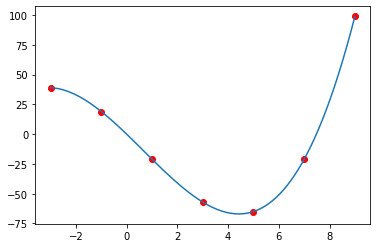

In [10]:
plt.scatter(X,Y,color='r',marker='o')
plt.plot(xt,yt)

In [11]:
x = sym.Symbol('x',real=True)
y = NewtonInterpolation(X,Y,x)
y

-10.0*x + 0.5*(x - 1.0)*(x + 1.0)*(1.0*x + 3.0) - 2.5*(x + 1.0)*(1.0*x + 3.0) + 9.0

In [12]:
y = sym.simplify(y)
y

x*(0.5*x**2 - 1.0*x - 20.5)